# ⚽ Exploring Football Data with StatsBomb and mplsoccer

Welcome to this comprehensive guide on how to choose a competition, select a match, and plot a pass by Lionel Messi in the 2022 World Cup Final! This tutorial leverages powerful open-source tools and data to help you visualize key moments in football.

### 🔧 Tools and Resources Used:
1. **StatsBomb Open Data** - [Repository](https://github.com/statsbomb/open-data.git)
2. **StatsBombPy API** - [Repository](https://github.com/statsbomb/statsbombpy)
3. **mplsoccer** - [Documentation](https://mplsoccer.readthedocs.io/)

### 🌟 Overview:
This notebook will guide you step-by-step through:
- Setting up your environment and installing necessary libraries.
- Selecting the 2022 FIFA World Cup Final.
- Plotting a specific pass by Lionel Messi using advanced visualization techniques.

### 📚 Step-by-Step Process:
1. **Environment Setup**: Ensure you have `StatsBombPy` and `mplsoccer` installed to access and visualize the data.
2. **Competition and Match Selection**: We will filter and select the 2022 World Cup and pinpoint the final match.
3. **Data Extraction and Visualization**: Extract event data and visualize a chosen pass from Messi during the final match using `mplsoccer`.

### 💻 Code and Implementation:
The following sections include detailed code snippets and explanations to walk you through each part of the process. From data extraction to advanced visualizations, this notebook provides everything you need to gain insights into football analytics.

---

**Author**: [@jrzmnt](https://github.com/jrzmnt)  
**Website**: [jrzmnt.github.io](https://jrzmnt.github.io) <br>
**Inspired by**: [@McKayJohns](https://www.youtube.com/@McKayJohns/)


### Importing Necessary Libraries for Soccer Data Analysis

This initial code snippet sets up the foundational tools needed for analyzing soccer data using Python. Let's break down what each line does:

1. **`import pandas as pd`**:
   - This line imports the `pandas` library, which is an essential tool for data manipulation and analysis in Python. `pandas` is widely used for handling structured data, such as DataFrames, allowing for efficient data processing and analysis.

2. **`from statsbombpy import sb`**:
   - Here, the `sb` module from `statsbombpy` is imported. `statsbombpy` is a library designed for fetching and working with soccer data provided by StatsBomb, a leading sports analytics company. This module helps in accessing various datasets related to soccer matches, players, and events, making it easier to analyze matches.

3. **`from mplsoccer import Pitch`**:
   - This line imports the `Pitch` class from `mplsoccer`, a specialized library for visualizing soccer data. The `Pitch` module allows you to create soccer field plots and overlay various data points and events, making it perfect for match analysis and visual storytelling in sports analytics.


In [1]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch

### Loading and Filtering Soccer Competition Data

In this section, we load competition data from the StatsBomb API and filter it for specific use. Here’s a breakdown of what each line of code does:

1. **`df = sb.competitions()`**:
   - This line retrieves a DataFrame containing information about various soccer competitions available in the StatsBomb dataset. The DataFrame includes columns such as competition IDs, competition names, and other relevant details.

2. **`filtered_df = df[df['competition_id'] == 43]`**:
   - Here, we filter the original DataFrame `df` to create `filtered_df`, which only includes rows where the `competition_id` is `43`. This is useful when we want to analyze data from a specific competition, such as a particular league or tournament.

3. **`filtered_df.tail()`**:
   - This command displays the last five rows of the `filtered_df`. It helps verify that the filtering operation was successful and gives a glimpse of the competition data that matched the specified condition.

In [2]:
df = sb.competitions()
filtered_df = df[df['competition_id'] == 43]
filtered_df.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
29,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-06-11T11:30:50.462448,2024-06-11T11:30:50.462448,2024-05-15T10:23:32.854925
30,43,3,International,FIFA World Cup,male,False,True,2018,2024-06-12T07:38:19.345758,2021-06-13T16:17:31.694,None,2024-06-12T07:38:19.345758
31,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
32,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530
33,43,51,International,FIFA World Cup,male,False,True,1974,2024-02-13T02:52:29.582599,2021-06-13T16:17:31.694,None,2024-02-13T02:52:29.582599


### World Cup 2022 Final: Argentina vs France

The code provided retrieves data related to the 2022 FIFA World Cup final between Argentina and France. In the context of the StatsBomb dataset, the following information applies:

- **`season_id=106`** refers to the 2022 season of the FIFA World Cup.
- **`competition_id=43`** corresponds to the FIFA World Cup competition in the StatsBomb dataset.

By using `sb.matches(competition_id=43, season_id=106)`, we specifically query matches from the 2022 FIFA World Cup, including the final where Argentina faced France. This final match was historically significant as it concluded in a dramatic penalty shootout, with Argentina ultimately winning the title.

In [3]:
sb.matches(competition_id=43, season_id=106).head(10)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
5,3857267,2022-11-29,17:00:00.000,International - FIFA World Cup,2022,Ecuador,Senegal,1,2,available,...,2023-05-19T13:52:07.885530,3,Group Stage,Sheikh Khalifa International Stadium,Clément Turpin,Gustavo Julio Alfaro,Aliou Cissé,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
7,3857287,2022-11-24,15:00:00.000,International - FIFA World Cup,2022,Uruguay,South Korea,0,0,available,...,2023-04-27T00:36:59.281195,1,Group Stage,Education City Stadium,Clément Turpin,Diego Martín Alonso López,Paulo Jorge Gomes Bento,1.1.0,2,2
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2


### Merging Event Data with 360 Data for the 2022 World Cup Final: Argentina vs France

This code block is designed to load, read, and merge event data with 360 data for the 2022 FIFA World Cup final between Argentina and France. The 360 data used here is sourced from **StatsBomb Open Data**, which is available for public use through their [GitHub repository](https://github.com/statsbomb/open-data.git). Here's an explanation of each part:

1. **`MATCH_ID = 3869685`**:
   - Stores the unique match ID for the final game between Argentina and France.

2. **`match_events_df = sb.events(match_id=MATCH_ID)`**:
   - Fetches the detailed event data for the specified match from the StatsBomb dataset. This DataFrame includes every event during the match, such as passes, shots, and fouls, along with timestamps and player involvement.

3. **`OPEN_DATA_360 = "../open-data/data/three-sixty/"`**:
   - Specifies the directory path where the 360 data is stored locally. The 360 data provides insight into player positions during each event, which is crucial for understanding the match's tactical context.

4. **`match_360_df = pd.read_json(f'{OPEN_DATA_360}{MATCH_ID}.json')`**:
   - Reads the 360 data for the match into a DataFrame from a JSON file. This DataFrame includes data on the position of all players at the time of each event. The 360 data in this context comes from **StatsBomb Open Data**, which is part of their publicly available datasets for educational and non-commercial use.

5. **`df_merged = pd.merge(left=match_events_df, right=match_360_df, left_on='id', right_on='event_uuid', how='left')`**:
   - Merges the event data (`match_events_df`) with the 360 data (`match_360_df`) on the event ID (`id` in `match_events_df` and `event_uuid` in `match_360_df`). The `how='left'` ensures that all events from `match_events_df` are retained, with additional contextual data from `match_360_df` included when available.


In [4]:
MATCH_ID = 3869685
match_events_df = sb.events(match_id=MATCH_ID)

OPEN_DATA_360 = "../open-data/data/three-sixty/"
match_360_df = pd.read_json(f'{OPEN_DATA_360}{MATCH_ID}.json')

df_merged = pd.merge(left=match_events_df, right=match_360_df, left_on='id', right_on='event_uuid', how='left')

### Filtering Pass Events for Lionel Messi in the 2022 World Cup Final

This code snippet filters the merged match data to extract only the passing events made by Lionel Messi during the 2022 World Cup final. Here’s what each part of the code does:

1. **`MESSI = 5503`**:
   - This variable stores the unique player ID for Lionel Messi as recognized in the StatsBomb dataset.

2. **`df_messi = df_merged[(df_merged['player_id'] == MESSI) & (df_merged['type'] == 'Pass')].reset_index(drop=True)`**:
   - Filters the `df_merged` DataFrame to create `df_messi`, which only includes rows where:
     - The `player_id` matches Messi's ID (`5503`), ensuring only events involving him are selected.
     - The `type` column is `'Pass'`, filtering to only include passing events.
   - The `reset_index(drop=True)` method resets the index of the resulting DataFrame for cleaner presentation.

In [5]:
MESSI = 5503 # messi id
df_messi = df_merged[(df_merged['player_id'] == MESSI) & (df_merged['type'] == 'Pass')].reset_index(drop=True)

### Extracting Start and End Locations of Passes by Lionel Messi

This part of the code extracts and separates the start and end locations of Messi's passes into new columns for easier analysis and visualization. Here's what each step does:

1. **`df_messi[['x_start', 'y_start']] = pd.DataFrame(df_messi['location'].tolist(), index=df_messi.index)`**:
   - The `location` column in `df_messi` contains lists representing the starting coordinates `[x, y]` of each event.
   - This line splits these coordinates into two separate columns, `x_start` and `y_start`, which hold the starting `x` and `y` positions of Messi's passes.
   - The `pd.DataFrame(..., index=df_messi.index)` ensures that the new DataFrame aligns with the index of `df_messi`.

2. **`df_messi[['x_end', 'y_end']] = pd.DataFrame(df_messi['pass_end_location'].tolist(), index=df_messi.index)`**:
   - The `pass_end_location` column contains lists representing the ending coordinates `[x, y]` of each pass.
   - This line extracts these coordinates into two new columns, `x_end` and `y_end`, representing the ending `x` and `y` positions of Messi's passes.


In [6]:
df_messi[['x_start', 'y_start']] = pd.DataFrame(df_messi['location'].tolist(), index=df_messi.index)
df_messi[['x_end', 'y_end']] = pd.DataFrame(df_messi['pass_end_location'].tolist(), index=df_messi.index)

### Visualizing Messi's Pass with 360 Data on a Soccer Pitch

This code snippet uses `mplsoccer` to plot one of Lionel Messi's passes on a soccer pitch along with the 360 data for additional context. Here's what each part of the code does:

1. **`p = Pitch(pitch_type='statsbomb')`**:
   - Initializes a `Pitch` object with the `statsbomb` pitch type, setting up a field that matches the dimensions used by StatsBomb data.

2. **`fig, ax = p.draw(figsize=(12, 8))`**:
   - Draws the pitch on which the data will be plotted. The `figsize` parameter sets the size of the plot for better visibility.

3. **`df = df_messi[0:1]`**:
   - Selects the first row from `df_messi`, which corresponds to one passing event by Messi. This allows for detailed visualization of a single pass.

4. **`p.scatter(x=df['x_start'], y=df['y_start'], ax=ax)`**:
   - Plots the starting point of Messi's pass on the pitch using a scatter plot.

5. **`p.lines(...)`**:
   - Draws a line representing Messi's pass. The `comet=True` parameter adds an effect that visually enhances the pass line, making it appear like a trailing comet.

6. **`for x in df.iloc[0]['freeze_frame']:`**:
   - Iterates through the `freeze_frame` data, which contains player positions at the time of the pass.
   - Checks if a player is Messi's teammate (`x['teammate']`), and sets the color accordingly:
     - Blue for teammates.
     - Red for opponents.

7. **`p.scatter(...)`**:
   - Plots the positions of players from the `freeze_frame` data on the pitch.
   - The `s=100` parameter sets the size of the markers for better visibility.
   - The color (`c=color`) changes based on whether the player is a teammate or an opponent.


Text(0.5, 1.0, "Visualization of Messi's Pass with Player Positions - 2022 World Cup Final")

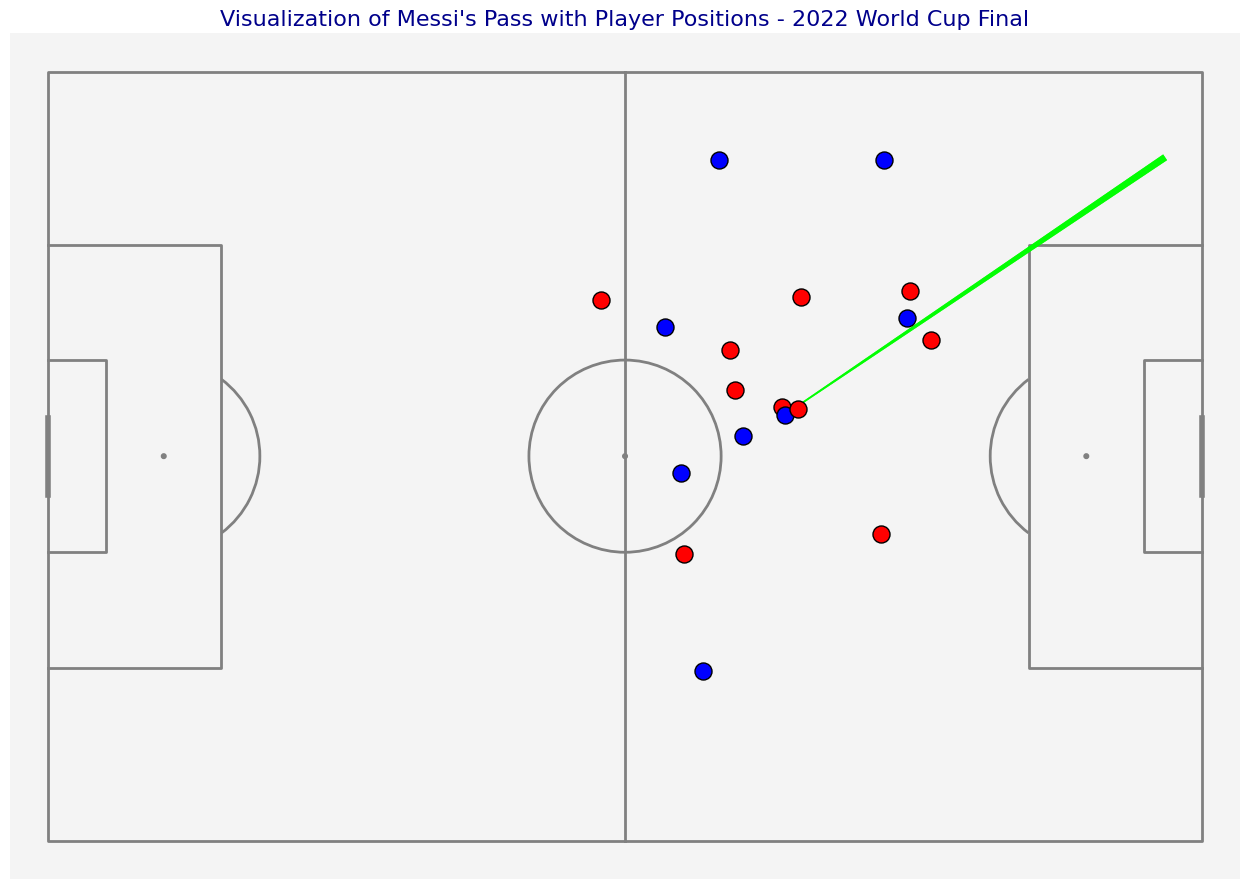

In [7]:
# Create the pitch and figure with custom colors and size
p = Pitch(pitch_type='statsbomb', line_color='grey', pitch_color='#f4f4f4')
fig, ax = p.draw(figsize=(14, 9))

# Select the first pass event for visualization
df = df_messi[0:1]

# Draw the pass line with an enhanced comet effect
p.lines(
    xstart=df['x_start'].values, 
    ystart=df['y_start'].values, 
    xend=df['x_end'].values, 
    yend=df['y_end'].values, 
    ax=ax, 
    comet=True, 
    color='lime', 
    linewidth=5, 
    alpha=0.9, 
    zorder=2
)

# Add scatter points for player positions from the freeze frame with color and marker variation
for x in df.iloc[0]['freeze_frame']:
    color = 'blue' if x['teammate'] else 'red'
    p.scatter(x=x['location'][0], y=x['location'][1], ax=ax, color=color, edgecolor='black', s=150, zorder=4)

# Add a descriptive title
ax.set_title("Visualization of Messi's Pass with Player Positions - 2022 World Cup Final", fontsize=16, color='darkblue')
